In [1]:
# DELETE BEFORE PUBLISHING
# This is just here so you can preview the styling on your local machine

from IPython.core.display import HTML
HTML("""
<style>
.usecase-title, .usecase-duration, .usecase-section-header {
    padding-left: 15px;
    padding-bottom: 10px;
    padding-top: 10px;
    padding-right: 15px;
    background-color: #0f9295;
    color: #fff;
}

.usecase-title {
    font-size: 1.7em;
    font-weight: bold;
}

.usecase-authors, .usecase-level, .usecase-skill {
    padding-left: 15px;
    padding-bottom: 7px;
    padding-top: 7px;
    background-color: #baeaeb;
    font-size: 1.4em;
    color: #121212;
}

.usecase-level-skill  {
    display: flex;
}

.usecase-level, .usecase-skill {
    width: 50%;
}

.usecase-duration, .usecase-skill {
    text-align: right;
    padding-right: 15px;
    padding-bottom: 8px;
    font-size: 1.4em;
}

.usecase-section-header {
    font-weight: bold;
    font-size: 1.5em;
}

.usecase-subsection-header, .usecase-subsection-blurb {
    font-weight: bold;
    font-size: 1.2em;
    color: #121212;
}

.usecase-subsection-blurb {
    font-size: 1em;
    font-style: italic;
}
</style>
""")

<div class="usecase-title">Smart Bin Waste_Collection AI Application T2 2023</div>

<div class="usecase-authors"><b>Authored by: </b>Barry Chen</div>

<div class="usecase-duration"><b>Duration:</b> {90} mins</div>

<div class="usecase-level-skill">
    <div class="usecase-level"><b>Level: </b>{Intermediate}</div>
    <div class="usecase-skill"><b>Pre-requisite Skills: </b>Python & Machine learning</div>
</div>

<div class="usecase-section-header">Scenario</div>

- For Council

Has the introduction of the Smart Bin reduced the illegal dumped rubbish and street sweeping?

How to maintain the effectiveness of the current Smart Bins to maximize their usage?

Can we predict when the smart bin will be fully filled so we can better prepare to empty them?

- For Pedestrian

Can the Council justify the spending on purchasing expensive smart bins?

Can we predict which smart bin is almost full, so we don't put litter into certain bins?

<div class="usecase-section-header">What this use case will teach you</div>

At the end of this use case you will:
- Data extract, pre-processing and visualization
- Pearson Correlation Method
- Logistic Regression Machine Learning application

<div class="usecase-section-header">Objective, Potential benefits and Background of the Use case from T2 2022</div>

# Objectives for the Exploratory Data Analysis
Smart bins provide data for councils, individuals and businesses towards efficiencies as well as a benefit on public health. No smart city without a smart bin.Many public utilities have sensors thus enabling connective capability as well as provide details on infrastructural usage.Smart bins unlike traditional waste bins reduced council clean-up costs and actually less usage on power cost. With respect to fill level are quite better as bins are able to hold up to three to five times the capacity of a standard 120-litre bins, the availability of sensors in the bin provide data accesible through a dashboard, via mobile apps that notifies collecting office.

Other benefits is less power usage, affords health benefits and council clean-up costs reduction.



# Benefits for City of Melbourne

The use case and exploratory data analysis provides a pathway to support the City of Melbourne in the following ways:

1 Support for the ‘Resource efficiency Usage’ which is a Priority 1.5 in Goal 1 of the vision of the city of Melbourne towards its journey in achieveing 'Future Melbourne 2026 Plan'.

2 Faciliate a sustainable environment which promote a garbage free roads, corridors and streets responsible for pollution and ecosystem management.

3 Support further discovery into the city of Melbourne becomining a leader in smart city innovation. 

#             Background on Waste Bin management in Victoria

Over the years, one of major vision of the city of Melbourne is to become a unique city, driven by innovative way of solving major problems in a more simplied way to accommodate changing needs, improve livability and maintain a leadership in sustainability.Maintaining a pool of dataset is critical to continious improvement towards a smart city goal and this is only achievable with an innovation step in our waste management awareness and processes. Currently, a number of bins are strategically located in Swanston, Bourke and Southbank streets  however pedestrians attitude of dumping litters around the streets and wrong bin usage continues to cause high cost of maintenance and other losses.  

According to the taxonomy for IoT waste manegement report by the International Journal of Creative Research Thoughts, effective IoT waste management system is acheivable in platforn with ultrasonic sensors. In other words, infrastructure (the bins, pipes), IoT technology (sensors, GPS/GPRS/Camera and actuators) and Programming software for routing,  scheduling and overall architecture of the system are required. The intelligent system ensures wet waste are seperated from dry waste, plastics are also identified as well provide a real time system. The analysis gives an advantage of sensors in that with GPS, smartbins are located, and google map gives where dustbins are placed.


## Part 1 Waste collected Per Month Data Set Analysis

### Data extraction and pre-processing data

In [1]:
import numpy as np
import pandas as pd

import os
import time
import datetime as dt

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Read data from https://data.melbourne.vic.gov.au/explore/dataset/waste-collected-per-month/information/
link = "https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/waste-collected-per-month/exports/csv?lang=en&timezone=Australia%2FSydney&use_labels=true&delimiter=%2C"
df = pd.read_csv(link)
df

,date,residential,public_litter_bins,dumped_rubbish,street_sweepings,mattresses,commingled_recycling,cardboard,hardwaste_to_landfill,hardwaste_recovered,hardwaste_total,green_waste,month
0,2015-01,1958.38,328.79,147.72,345.68,501,642.18,132.66,85.52,0.00,85.52,3.52,January
1,2016-02,2202.28,281.46,151.18,293.00,173,708.31,196.96,41.72,19.12,60.84,5.56,February
2,2009-05,1249.74,330.36,169.98,691.28,0,376.02,168.52,14.82,0.00,14.82,2.79,May
3,2012-10,1732.58,377.41,143.08,402.98,216,497.62,168.29,37.64,0.00,37.64,8.62,October
4,2014-06,2093.58,371.56,137.66,469.77,204,526.92,148.23,74.64,0.00,74.64,4.00,June
...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,2017-05,2329.93,361.50,217.90,440.26,372,782.42,223.16,40.30,14.52,54.82,8.96,May
128,2019-09,2932.60,303.76,77.72,237.74,471,201.06,133.34,103.96,34.39,138.35,8.06,September
129,2020-03,2627.32,254.42,101.06,268.64,782,890.26,56.36,105.64,38.40,144.04,12.40,March
130,2019-10,2742.06,338.56,79.76,324.10,429,750.24,133.16,101.50,31.07,132.57,8.96,October


In [3]:
#check missing values
print(df.isna().sum())
print()
print("Dataset has",sum(df.isna().sum()),"missing values")

date                     0
residential              0
public_litter_bins       0
dumped_rubbish           0
street_sweepings         0
mattresses               0
commingled_recycling     0
cardboard                0
hardwaste_to_landfill    0
hardwaste_recovered      0
hardwaste_total          0
green_waste              0
month                    0
dtype: int64

Dataset has 0 missing values


In [4]:
#convert the date to date type
df.date=df.date.apply(pd.to_datetime)
df

,date,residential,public_litter_bins,dumped_rubbish,street_sweepings,mattresses,commingled_recycling,cardboard,hardwaste_to_landfill,hardwaste_recovered,hardwaste_total,green_waste,month
0,2015-01-01,1958.38,328.79,147.72,345.68,501,642.18,132.66,85.52,0.00,85.52,3.52,January
1,2016-02-01,2202.28,281.46,151.18,293.00,173,708.31,196.96,41.72,19.12,60.84,5.56,February
2,2009-05-01,1249.74,330.36,169.98,691.28,0,376.02,168.52,14.82,0.00,14.82,2.79,May
3,2012-10-01,1732.58,377.41,143.08,402.98,216,497.62,168.29,37.64,0.00,37.64,8.62,October
4,2014-06-01,2093.58,371.56,137.66,469.77,204,526.92,148.23,74.64,0.00,74.64,4.00,June
...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,2017-05-01,2329.93,361.50,217.90,440.26,372,782.42,223.16,40.30,14.52,54.82,8.96,May
128,2019-09-01,2932.60,303.76,77.72,237.74,471,201.06,133.34,103.96,34.39,138.35,8.06,September
129,2020-03-01,2627.32,254.42,101.06,268.64,782,890.26,56.36,105.64,38.40,144.04,12.40,March
130,2019-10-01,2742.06,338.56,79.76,324.10,429,750.24,133.16,101.50,31.07,132.57,8.96,October


In [5]:
#make a copy of the data
df_waste=df.copy()
#extract year and month from date
df_waste['Year']=df_waste.date.dt.year
df_waste['Month']=df_waste.date.dt.month
df_waste

,date,residential,public_litter_bins,dumped_rubbish,street_sweepings,mattresses,commingled_recycling,cardboard,hardwaste_to_landfill,hardwaste_recovered,hardwaste_total,green_waste,month,Year,Month
0,2015-01-01,1958.38,328.79,147.72,345.68,501,642.18,132.66,85.52,0.00,85.52,3.52,January,2015,1
1,2016-02-01,2202.28,281.46,151.18,293.00,173,708.31,196.96,41.72,19.12,60.84,5.56,February,2016,2
2,2009-05-01,1249.74,330.36,169.98,691.28,0,376.02,168.52,14.82,0.00,14.82,2.79,May,2009,5
3,2012-10-01,1732.58,377.41,143.08,402.98,216,497.62,168.29,37.64,0.00,37.64,8.62,October,2012,10
4,2014-06-01,2093.58,371.56,137.66,469.77,204,526.92,148.23,74.64,0.00,74.64,4.00,June,2014,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,2017-05-01,2329.93,361.50,217.90,440.26,372,782.42,223.16,40.30,14.52,54.82,8.96,May,2017,5
128,2019-09-01,2932.60,303.76,77.72,237.74,471,201.06,133.34,103.96,34.39,138.35,8.06,September,2019,9
129,2020-03-01,2627.32,254.42,101.06,268.64,782,890.26,56.36,105.64,38.40,144.04,12.40,March,2020,3
130,2019-10-01,2742.06,338.56,79.76,324.10,429,750.24,133.16,101.50,31.07,132.57,8.96,October,2019,10


In [6]:
df_waste=df_waste.drop(['date','month'],axis=1)
df_waste

,residential,public_litter_bins,dumped_rubbish,street_sweepings,mattresses,commingled_recycling,cardboard,hardwaste_to_landfill,hardwaste_recovered,hardwaste_total,green_waste,Year,Month
0,1958.38,328.79,147.72,345.68,501,642.18,132.66,85.52,0.00,85.52,3.52,2015,1
1,2202.28,281.46,151.18,293.00,173,708.31,196.96,41.72,19.12,60.84,5.56,2016,2
2,1249.74,330.36,169.98,691.28,0,376.02,168.52,14.82,0.00,14.82,2.79,2009,5
3,1732.58,377.41,143.08,402.98,216,497.62,168.29,37.64,0.00,37.64,8.62,2012,10
4,2093.58,371.56,137.66,469.77,204,526.92,148.23,74.64,0.00,74.64,4.00,2014,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,2329.93,361.50,217.90,440.26,372,782.42,223.16,40.30,14.52,54.82,8.96,2017,5
128,2932.60,303.76,77.72,237.74,471,201.06,133.34,103.96,34.39,138.35,8.06,2019,9
129,2627.32,254.42,101.06,268.64,782,890.26,56.36,105.64,38.40,144.04,12.40,2020,3
130,2742.06,338.56,79.76,324.10,429,750.24,133.16,101.50,31.07,132.57,8.96,2019,10


### Data Analysis

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

df_wasteMonth=df_waste.groupby('Month').agg({'dumped_rubbish':'mean', 'street_sweepings':'mean'}).round(0)
df_wasteMonth

,dumped_rubbish,street_sweepings
Month,,
1,158.0,369.0
2,142.0,369.0
3,150.0,412.0
4,145.0,425.0
5,186.0,587.0
6,162.0,472.0
7,140.0,377.0
8,145.0,330.0
9,135.0,359.0


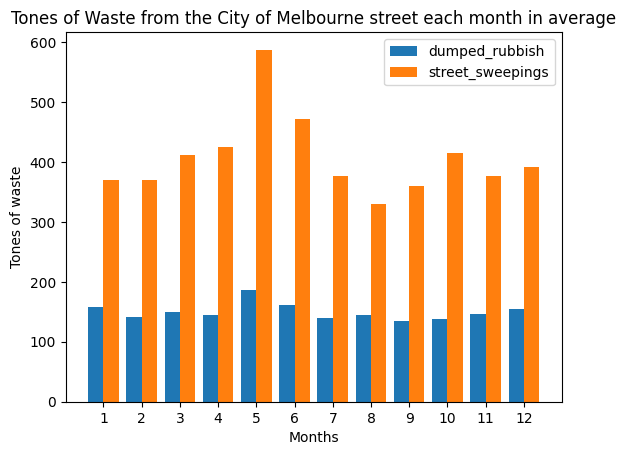

In [8]:
#visualization
X = df_wasteMonth.index
X_axis = np.arange(len(df_wasteMonth.index))
  
plt.bar(X_axis - 0.2, df_wasteMonth['dumped_rubbish'], 0.4, label = 'dumped_rubbish')
plt.bar(X_axis + 0.2, df_wasteMonth['street_sweepings'],0.4, label = 'street_sweepings')
  
plt.xticks(X_axis, X)
plt.xlabel("Months")
plt.ylabel("Tones of waste")
plt.title("Tones of Waste from the City of Melbourne street each month in average")
plt.legend()
plt.show()

From the result, we can see May usually has the most tones of rubbish that is illegally dumped or have to be swept from the street, maybe worth conducting further analysis on this matter.

In [9]:
df_wasteYear=df_waste.groupby('Year').agg({'dumped_rubbish':'sum', 'street_sweepings':'sum'}).round(0)
df_wasteYear

,dumped_rubbish,street_sweepings
Year,,
2009,1441.0,5321.0
2010,1801.0,6579.0
2011,1832.0,6145.0
2012,1912.0,5590.0
2013,1615.0,5103.0
2014,1672.0,4864.0
2015,2203.0,4350.0
2016,1989.0,3896.0
2017,1804.0,3791.0


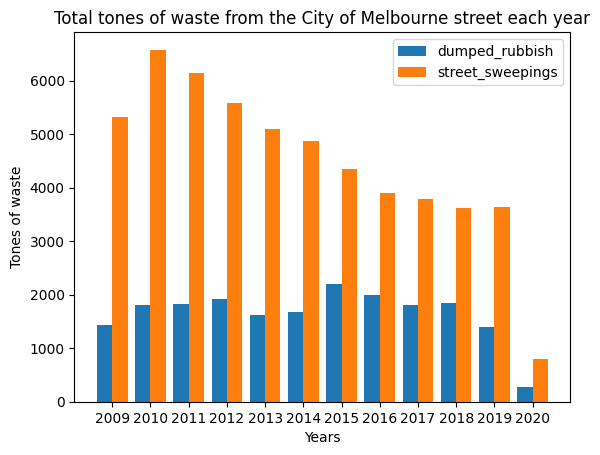

In [10]:
#visualization
X = df_wasteYear.index
X_axis = np.arange(len(df_wasteYear.index))
  
plt.bar(X_axis - 0.2, df_wasteYear['dumped_rubbish'], 0.4, label = 'dumped_rubbish')
plt.bar(X_axis + 0.2, df_wasteYear['street_sweepings'],0.4, label = 'street_sweepings')
  
plt.xticks(X_axis, X)
plt.xlabel("Years")
plt.ylabel("Tones of waste")
plt.title("Total tones of waste from the City of Melbourne street each year")
plt.legend()
plt.show()

From the result above we can see street sweepings rubbish gradually reduced since 2011, but the illegally dumped rubbish has a sharp increase during 2015 but then gradually reduce after that, would this be the effect of the Smart bin introduction by Melbourne City? Let's examine more.

### Smart Bin Effect

CoM introduced smart bin around Aug 2015, so we assume smart bin has been installed and used since Aug 2015

https://digitalgov.com.au/2015/08/melbourne-smart-bins/

In [11]:
df_wasteBin=df.copy()
# df_wasteBin.date=df_wasteBin.date.dt.strftime('%Y-%m')
df_wasteBin

,date,residential,public_litter_bins,dumped_rubbish,street_sweepings,mattresses,commingled_recycling,cardboard,hardwaste_to_landfill,hardwaste_recovered,hardwaste_total,green_waste,month
0,2015-01-01,1958.38,328.79,147.72,345.68,501,642.18,132.66,85.52,0.00,85.52,3.52,January
1,2016-02-01,2202.28,281.46,151.18,293.00,173,708.31,196.96,41.72,19.12,60.84,5.56,February
2,2009-05-01,1249.74,330.36,169.98,691.28,0,376.02,168.52,14.82,0.00,14.82,2.79,May
3,2012-10-01,1732.58,377.41,143.08,402.98,216,497.62,168.29,37.64,0.00,37.64,8.62,October
4,2014-06-01,2093.58,371.56,137.66,469.77,204,526.92,148.23,74.64,0.00,74.64,4.00,June
...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,2017-05-01,2329.93,361.50,217.90,440.26,372,782.42,223.16,40.30,14.52,54.82,8.96,May
128,2019-09-01,2932.60,303.76,77.72,237.74,471,201.06,133.34,103.96,34.39,138.35,8.06,September
129,2020-03-01,2627.32,254.42,101.06,268.64,782,890.26,56.36,105.64,38.40,144.04,12.40,March
130,2019-10-01,2742.06,338.56,79.76,324.10,429,750.24,133.16,101.50,31.07,132.57,8.96,October


In [12]:
#add label 0 to indicate smart bin has not been installed
df_wasteBin['smartbin']=0
df_wasteBin['smartbin']

0      0
1      0
2      0
3      0
4      0
      ..
127    0
128    0
129    0
130    0
131    0
Name: smartbin, Length: 132, dtype: int64

In [13]:
#set the variable that smart bin have start to installed in the city
dateBin=dt.datetime(2015,8,1)
print(dateBin)

2015-08-01 00:00:00


In [14]:
#if the date is larger than the smart bin installation date, replace 0 with 1
for i in range(len(df_wasteBin['date'])):
    if df_wasteBin.date[i] >= dateBin:
        df_wasteBin['smartbin'][i]=1

In [15]:
df_wasteBin

,date,residential,public_litter_bins,dumped_rubbish,street_sweepings,mattresses,commingled_recycling,cardboard,hardwaste_to_landfill,hardwaste_recovered,hardwaste_total,green_waste,month,smartbin
0,2015-01-01,1958.38,328.79,147.72,345.68,501,642.18,132.66,85.52,0.00,85.52,3.52,January,0
1,2016-02-01,2202.28,281.46,151.18,293.00,173,708.31,196.96,41.72,19.12,60.84,5.56,February,1
2,2009-05-01,1249.74,330.36,169.98,691.28,0,376.02,168.52,14.82,0.00,14.82,2.79,May,0
3,2012-10-01,1732.58,377.41,143.08,402.98,216,497.62,168.29,37.64,0.00,37.64,8.62,October,0
4,2014-06-01,2093.58,371.56,137.66,469.77,204,526.92,148.23,74.64,0.00,74.64,4.00,June,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,2017-05-01,2329.93,361.50,217.90,440.26,372,782.42,223.16,40.30,14.52,54.82,8.96,May,1
128,2019-09-01,2932.60,303.76,77.72,237.74,471,201.06,133.34,103.96,34.39,138.35,8.06,September,1
129,2020-03-01,2627.32,254.42,101.06,268.64,782,890.26,56.36,105.64,38.40,144.04,12.40,March,1
130,2019-10-01,2742.06,338.56,79.76,324.10,429,750.24,133.16,101.50,31.07,132.57,8.96,October,1


In [16]:
#make a copy of the data
df_wasteBin2=df_wasteBin.copy()
#extract year and month from date
df_wasteBin2['Year']=df_wasteBin2.date.dt.year
df_wasteBin2['Month']=df_wasteBin2.date.dt.month
df_wasteBin2=df_wasteBin2.drop(['date','month'],axis=1)
df_wasteBin2

,residential,public_litter_bins,dumped_rubbish,street_sweepings,mattresses,commingled_recycling,cardboard,hardwaste_to_landfill,hardwaste_recovered,hardwaste_total,green_waste,smartbin,Year,Month
0,1958.38,328.79,147.72,345.68,501,642.18,132.66,85.52,0.00,85.52,3.52,0,2015,1
1,2202.28,281.46,151.18,293.00,173,708.31,196.96,41.72,19.12,60.84,5.56,1,2016,2
2,1249.74,330.36,169.98,691.28,0,376.02,168.52,14.82,0.00,14.82,2.79,0,2009,5
3,1732.58,377.41,143.08,402.98,216,497.62,168.29,37.64,0.00,37.64,8.62,0,2012,10
4,2093.58,371.56,137.66,469.77,204,526.92,148.23,74.64,0.00,74.64,4.00,0,2014,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,2329.93,361.50,217.90,440.26,372,782.42,223.16,40.30,14.52,54.82,8.96,1,2017,5
128,2932.60,303.76,77.72,237.74,471,201.06,133.34,103.96,34.39,138.35,8.06,1,2019,9
129,2627.32,254.42,101.06,268.64,782,890.26,56.36,105.64,38.40,144.04,12.40,1,2020,3
130,2742.06,338.56,79.76,324.10,429,750.24,133.16,101.50,31.07,132.57,8.96,1,2019,10


### Applied Pearson correlation method to identify data correlation with the introduction of the Smart Bin

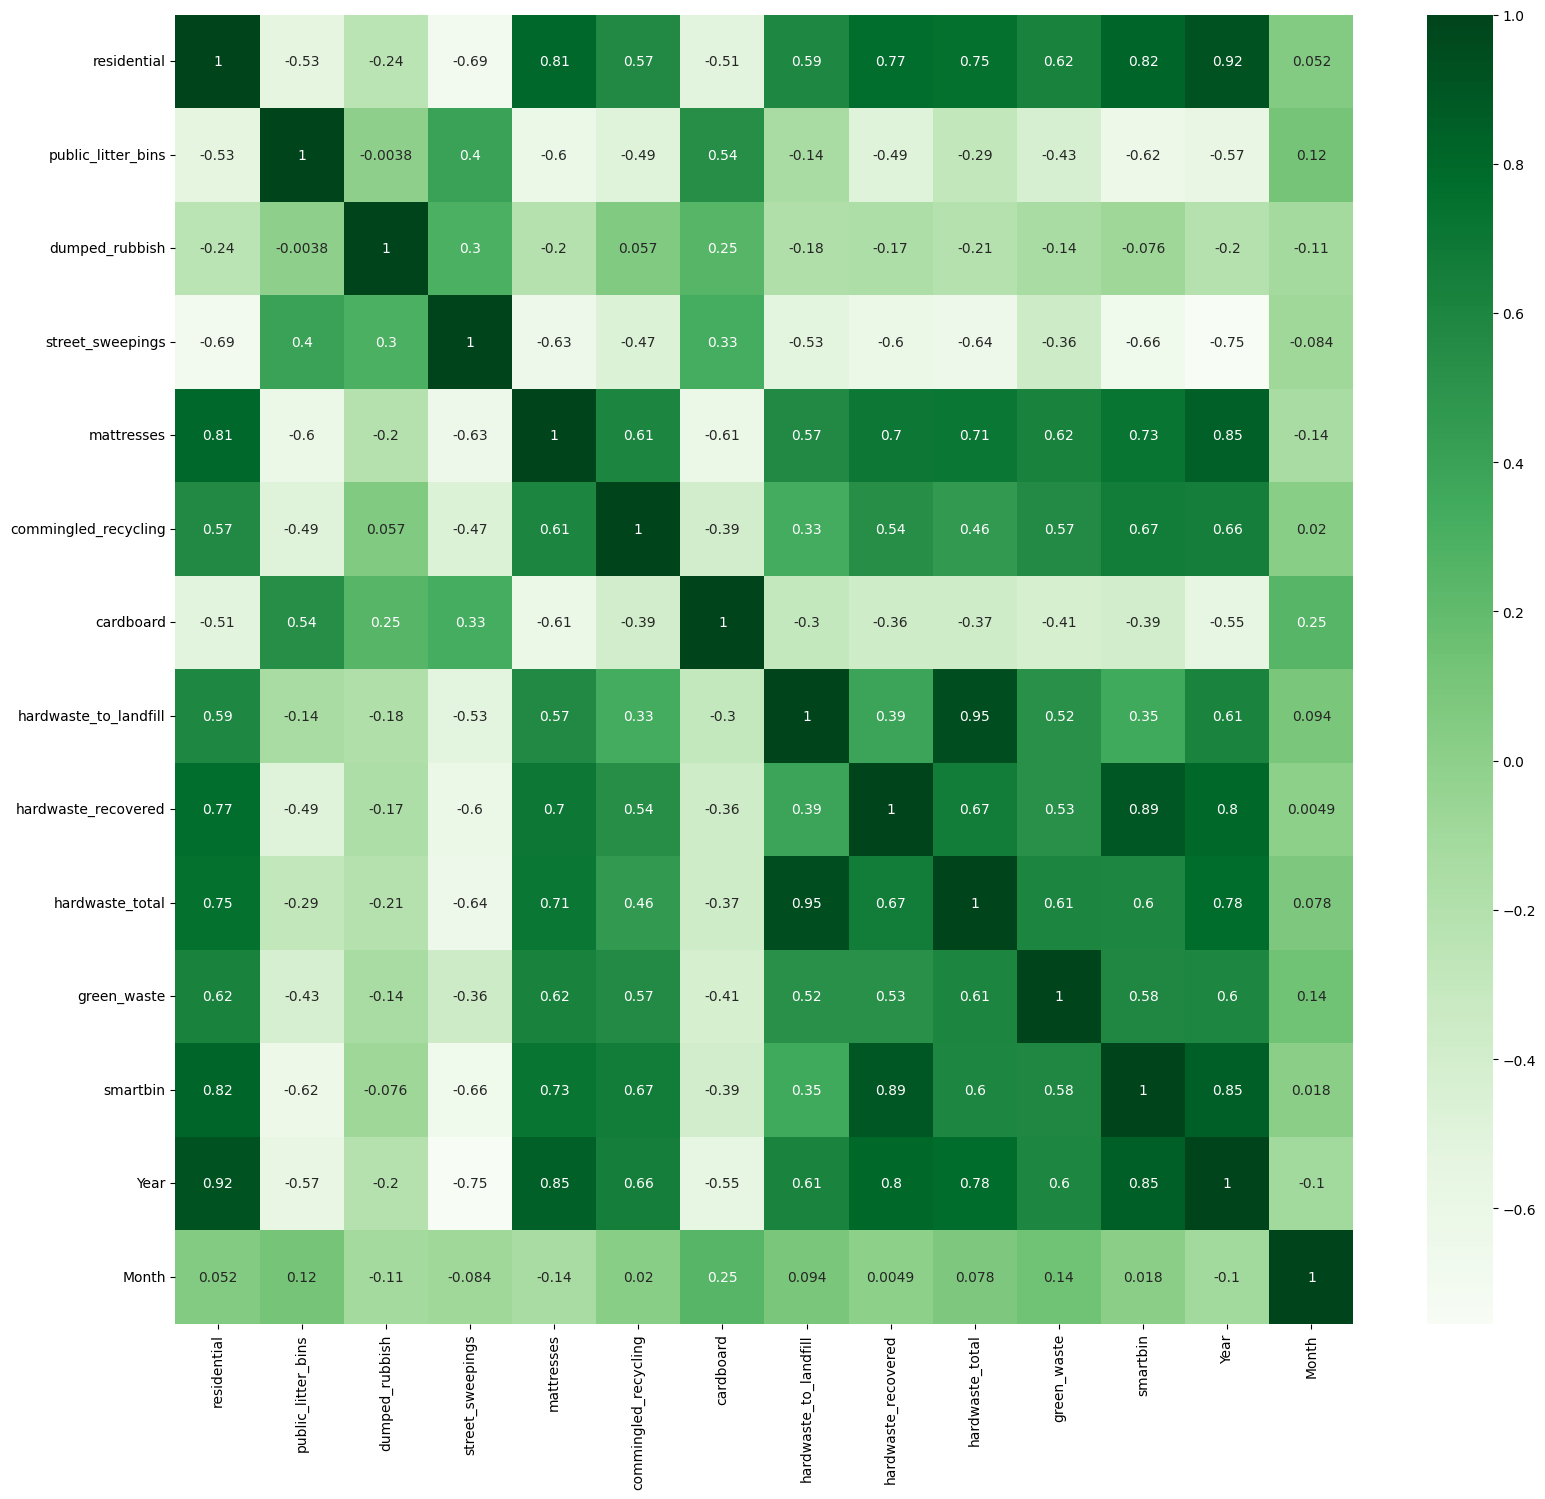

In [17]:
plt.figure(figsize=(19,17))
#Pearson correlation measure
corr_wastebin=df_wasteBin2.corr()
sns.heatmap(corr_wastebin, annot=True, cmap=plt.cm.Greens)
plt.show()

In [18]:
#Correlation with output variable
corr_target = corr_wastebin["smartbin"]
print('Data Pearson Correlation')
corr_target

Data Pearson Correlation


residential              0.819205
public_litter_bins      -0.624701
dumped_rubbish          -0.075994
street_sweepings        -0.656449
mattresses               0.725705
commingled_recycling     0.670770
cardboard               -0.387573
hardwaste_to_landfill    0.353464
hardwaste_recovered      0.892717
hardwaste_total          0.602019
green_waste              0.582426
smartbin                 1.000000
Year                     0.850039
Month                    0.017762
Name: smartbin, dtype: float64

In [19]:
#Selecting highly negative correlated features
relevant_pearson = corr_target[corr_target<-0.5]
print("Most relevent feature from Pearson correlation measure:\n",relevant_pearson)

Most relevent feature from Pearson correlation measure:
 public_litter_bins   -0.624701
street_sweepings     -0.656449
Name: smartbin, dtype: float64


From the Pearson correlation graph above, we can see as the smart bin was introduced, rubbish from public litter bins and street sweeping was greatly reduced since the smart bin feature and street sweeping feature have a high negative correlation. On the other hand, the illegally dumped rubbish feature seems to have a weak negative correlation with the introduction of the Smart bins, suggesting the installation of the Smart Bins has less effect on reducing illegally dumped rubbish.

### Apply Logistic Regression Machine Learning model to check feature important

In [20]:
featureBin=df_wasteBin2.drop('smartbin',axis=1)
labelBin=df_wasteBin2['smartbin']

In [21]:
#Logistic Regression Feature Importance
from sklearn.linear_model import LogisticRegressionCV
lr_model = LogisticRegressionCV(random_state=16, max_iter=1000,class_weight='balanced')
# fit the model
lr_model.fit(featureBin, labelBin)
# extract importance scores 
f_importance_lr = lr_model.coef_[0]
# summarize feature importance
for i,v in enumerate(f_importance_lr):
    v=round(v,4)
    print("Feature {} importance score: {}".format(featureBin.columns[i],v))

Feature residential importance score: 0.0085
Feature public_litter_bins importance score: -0.0122
Feature dumped_rubbish importance score: 0.0031
Feature street_sweepings importance score: -0.0132
Feature mattresses importance score: 0.0013
Feature commingled_recycling importance score: 0.0133
Feature cardboard importance score: 0.0039
Feature hardwaste_to_landfill importance score: -0.0056
Feature hardwaste_recovered importance score: 0.0059
Feature hardwaste_total importance score: 0.0003
Feature green_waste importance score: 0.0007
Feature Year importance score: -0.0089
Feature Month importance score: 0.0003


The positive scores indicate how well a feature predict smartbin value 1 (smart bin installed), and the negative scores indicate how well the feature predict smartbin value 0 (no smart bin installed).

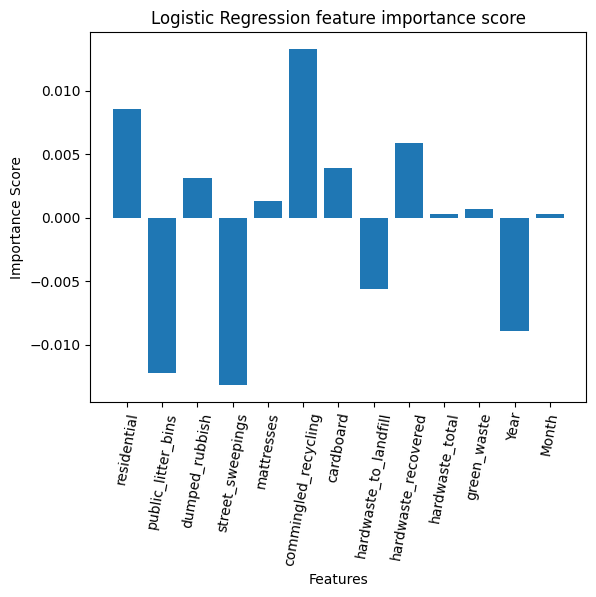

In [22]:
#plot feature importance score  
plt.bar(featureBin.columns, f_importance_lr)
plt.xticks(rotation=80)
plt.xlabel("Features")
plt.ylabel('Importance Score')
plt.title("Logistic Regression feature importance score")
plt.show()

In [23]:
f_impor_df=pd.DataFrame(data={'Feature':featureBin.columns,'LogisticRegression_Score':f_importance_lr})
f_impor_df.sort_values(by='LogisticRegression_Score', ascending=False)

,Feature,LogisticRegression_Score
5,commingled_recycling,0.013280
0,residential,0.008529
8,hardwaste_recovered,0.005898
6,cardboard,0.003937
2,dumped_rubbish,0.003126
4,mattresses,0.001297
10,green_waste,0.000670
9,hardwaste_total,0.000304
12,Month,0.000268
7,hardwaste_to_landfill,-0.005594


From the result above, we can see feature commingled_recycling has the highest positive score in-relate to whether there are smart bins installed, meaning by introducing smart bins, increased the tones of recycled rubbish collected. On the other hand, both public_litter_bins and street_sweepings features have high negative scores, indicating that as smart bins are installed, tonnes of rubbish collected from public litter bins and street sweepings have greatly reduced, as analysed by the machine learning model.

## Part 2 - Implement AI/ML solution to predict Bin Status using Smart-bins-argyle-square Dataset

In [24]:
#Extract data
link = "https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/smart-bins-argyle-square/exports/csv?lang=en&timezone=Australia%2FSydney&use_labels=true&delimiter=%2C"
df_bin = pd.read_csv(link)
df_bin

,time,serial,Sensor Name,status_current_fill_level,bin_status,last_update,product_type,description,address,latlong,wastebasket_size
0,2021-05-15T19:01:49+10:00,FB1000001905AA12,Internal Bin Sensor 5,19,Low,NaN,CleanFLEX,Argyle - FB1000001905AA12,"Piazza Italia, Unnamed Road, Carlton VIC 3053,...","-37.802367, 144.966167",NaN
1,2021-05-15T20:53:51+10:00,FB1000001905AA11,NaN,23,Low,NaN,CleanFLEX,Argyle - FB1000001905AA11,"10 Argyle Pl N, Carlton VIC 3053, Australia","-37.802133, 144.966083",NaN
2,2021-05-16T12:06:58+10:00,FB1000001905AA07,Internal Bin Sensor 7,5,Low,NaN,CleanFLEX,Argyle - FB1000001905AA07,"Grattan Pl, Carlton VIC 3053, Australia","-37.803117, 144.965233",NaN
3,2021-05-16T18:32:29+10:00,FB1000001905AA16,External Bin Sensor 5,2,Low,NaN,CleanFLEX,Argyle - FB1000001905AA16,"126 Cardigan St, Carlton VIC 3053, Australia","-37.802533, 144.965317",NaN
4,2021-05-16T21:51:02+10:00,FB1000001905AA08,Internal Bin Sensor 8,100,Full,NaN,CleanFLEX,Argyle - FB1000001905AA08,"Piazza Italia, Unnamed Road, Carlton VIC 3053,...","-37.802617, 144.965817",NaN
...,...,...,...,...,...,...,...,...,...,...,...
30626,2021-05-24T12:49:06+10:00,FB1000001905AA05,NaN,7,Low,NaN,CleanFLEX,Argyle - FB1000001905AA05,"Argyle Square, 13-19 Argyle Pl N, Carlton VIC ...","-37.802983, 144.966267",NaN
30627,2021-05-24T13:14:24+10:00,FB1000001905AA16,External Bin Sensor 5,28,Low,NaN,CleanFLEX,Argyle - FB1000001905AA16,"126 Cardigan St, Carlton VIC 3053, Australia","-37.802533, 144.965317",NaN
30628,2021-05-24T14:53:26+10:00,FB1000001905AA11,NaN,28,Low,NaN,CleanFLEX,Argyle - FB1000001905AA11,"10 Argyle Pl N, Carlton VIC 3053, Australia","-37.802133, 144.966083",NaN
30629,2021-05-24T15:27:43+10:00,FB1000001905AA13,Internal Bin Sensor 6,39,Half Full,NaN,CleanFLEX,Argyle - FB1000001905AA13,"23 Argyle Pl N, Carlton VIC 3053, Australia",NaN,NaN


In [25]:
#Data pre-processing
#iterate each column
print('Unique values of each columns except time column \n')
for col in df_bin.columns:
    #skip first column
    if col == 'time':
        pass
    #print out unique value of rest of the columns
    else:
        print(col,'unique value:',df_bin[col].unique())
        print('\n')

Unique values of each columns except time column 

serial unique value: ['FB1000001905AA12' 'FB1000001905AA11' 'FB1000001905AA07'
 'FB1000001905AA16' 'FB1000001905AA08' 'FB1000001905AA13'
 'FB1000001905AA17' 'FB1000001905AA02' 'FB1000001905AA18'
 'FB1000001905AA00' 'FB1000001905AA04' 'FB1000001905AA05'
 'FB1000001905AA15' 'FB1000001905AA19' 'FB1000001905AA14'
 'FB1000001905AA01' 'FB1000001905AA06' 'FB1000001905AA03'
 'FB1000001905AA09' 'FB1000001905AA10']


Sensor Name unique value: ['Internal Bin Sensor 5' nan 'Internal Bin Sensor 7'
 'External Bin Sensor 5' 'Internal Bin Sensor 8' 'Internal Bin Sensor 6'
 'External Bin Sensor 1' 'External Bin Sensor 2' 'Internal Bin Sensor 13'
 'Internal Bin Sensor  2' 'External Bin Sensor 3' 'Internal Bin Sensor 14'
 'Internal Bin Sensor 11' 'Internal Bin Sensor 15' 'Internal Bin Sensor 9'
 'Internal Bin Sensor 4']


status_current_fill_level unique value: [ 19  23   5   2 100  29  30  34  15   6  89  45  24   4  18  39  33   7
   8  36  64  31  47 

In [26]:
#drop columns that are duplicated or provide no useful information
df_binClean = df_bin.copy() #make a copy of the dataset
df_binClean = df_binClean.drop(['Sensor Name','last_update','product_type','description','address','wastebasket_size'], axis=1)
print("New dataset shape after dropping columns:",df_binClean.shape)
df_binClean

New dataset shape after dropping columns: (30631, 5)


,time,serial,status_current_fill_level,bin_status,latlong
0,2021-05-15T19:01:49+10:00,FB1000001905AA12,19,Low,"-37.802367, 144.966167"
1,2021-05-15T20:53:51+10:00,FB1000001905AA11,23,Low,"-37.802133, 144.966083"
2,2021-05-16T12:06:58+10:00,FB1000001905AA07,5,Low,"-37.803117, 144.965233"
3,2021-05-16T18:32:29+10:00,FB1000001905AA16,2,Low,"-37.802533, 144.965317"
4,2021-05-16T21:51:02+10:00,FB1000001905AA08,100,Full,"-37.802617, 144.965817"
...,...,...,...,...,...
30626,2021-05-24T12:49:06+10:00,FB1000001905AA05,7,Low,"-37.802983, 144.966267"
30627,2021-05-24T13:14:24+10:00,FB1000001905AA16,28,Low,"-37.802533, 144.965317"
30628,2021-05-24T14:53:26+10:00,FB1000001905AA11,28,Low,"-37.802133, 144.966083"
30629,2021-05-24T15:27:43+10:00,FB1000001905AA13,39,Half Full,NaN


In [27]:
#check missing values
print(df_binClean.isna().sum())
print()
print("Dataset has",sum(df_binClean.isna().sum()),"missing values")

time                            0
serial                          0
status_current_fill_level       0
bin_status                      0
latlong                      5585
dtype: int64

Dataset has 5585 missing values


In [28]:
#extract data that have null values 
print('Following sensor data have no location data \n')
df_binClean.loc[df_binClean['latlong'].isnull()]

Following sensor data have no location data 



,time,serial,status_current_fill_level,bin_status,latlong
8,2021-05-17T13:02:28+10:00,FB1000001905AA13,15,Low,NaN
12,2021-05-17T23:46:47+10:00,FB1000001905AA18,6,Low,NaN
13,2021-05-18T01:34:41+10:00,FB1000001905AA00,89,Full,NaN
18,2021-05-18T07:02:28+10:00,FB1000001905AA13,18,Low,NaN
23,2021-05-18T13:34:43+10:00,FB1000001905AA00,89,Full,NaN
...,...,...,...,...,...
30606,2021-05-10T13:35:21+10:00,FB1000001905AA00,90,Full,NaN
30617,2021-05-24T01:34:46+10:00,FB1000001905AA00,67,Half Full,NaN
30620,2021-05-24T06:24:50+10:00,FB1000001905AA18,3,Low,NaN
30622,2021-05-24T07:34:46+10:00,FB1000001905AA00,78,Full,NaN


Since location attribute cannot be estimated and can have significant impact on the model prediction, procee to drop the sensor data that have null location values

In [29]:
#dropping sensor data that have null location data
df_binClean.dropna(inplace=True)
print("New dataset shape after dropping NaN value columns:",df_binClean.shape)
df_binClean

New dataset shape after dropping NaN value columns: (25046, 5)


,time,serial,status_current_fill_level,bin_status,latlong
0,2021-05-15T19:01:49+10:00,FB1000001905AA12,19,Low,"-37.802367, 144.966167"
1,2021-05-15T20:53:51+10:00,FB1000001905AA11,23,Low,"-37.802133, 144.966083"
2,2021-05-16T12:06:58+10:00,FB1000001905AA07,5,Low,"-37.803117, 144.965233"
3,2021-05-16T18:32:29+10:00,FB1000001905AA16,2,Low,"-37.802533, 144.965317"
4,2021-05-16T21:51:02+10:00,FB1000001905AA08,100,Full,"-37.802617, 144.965817"
...,...,...,...,...,...
30625,2021-05-24T11:21:21+10:00,FB1000001905AA02,9,Low,"-37.803183, 144.965267"
30626,2021-05-24T12:49:06+10:00,FB1000001905AA05,7,Low,"-37.802983, 144.966267"
30627,2021-05-24T13:14:24+10:00,FB1000001905AA16,28,Low,"-37.802533, 144.965317"
30628,2021-05-24T14:53:26+10:00,FB1000001905AA11,28,Low,"-37.802133, 144.966083"


In [30]:
#check missing values again
print(df_binClean.isna().sum())
print()
print("Dataset has",sum(df_binClean.isna().sum()),"missing values")

time                         0
serial                       0
status_current_fill_level    0
bin_status                   0
latlong                      0
dtype: int64

Dataset has 0 missing values


In [31]:
df_binClean.dtypes

time                         object
serial                       object
status_current_fill_level     int64
bin_status                   object
latlong                      object
dtype: object

In [32]:
#reset index after dropping row data
df_binClean.reset_index(inplace=True, drop=True)
df_binClean

,time,serial,status_current_fill_level,bin_status,latlong
0,2021-05-15T19:01:49+10:00,FB1000001905AA12,19,Low,"-37.802367, 144.966167"
1,2021-05-15T20:53:51+10:00,FB1000001905AA11,23,Low,"-37.802133, 144.966083"
2,2021-05-16T12:06:58+10:00,FB1000001905AA07,5,Low,"-37.803117, 144.965233"
3,2021-05-16T18:32:29+10:00,FB1000001905AA16,2,Low,"-37.802533, 144.965317"
4,2021-05-16T21:51:02+10:00,FB1000001905AA08,100,Full,"-37.802617, 144.965817"
...,...,...,...,...,...
25041,2021-05-24T11:21:21+10:00,FB1000001905AA02,9,Low,"-37.803183, 144.965267"
25042,2021-05-24T12:49:06+10:00,FB1000001905AA05,7,Low,"-37.802983, 144.966267"
25043,2021-05-24T13:14:24+10:00,FB1000001905AA16,28,Low,"-37.802533, 144.965317"
25044,2021-05-24T14:53:26+10:00,FB1000001905AA11,28,Low,"-37.802133, 144.966083"


##### Handle time data

In [33]:
#separate time data into various column
df_binC2=df_binClean.copy()
df_binC2['year']=0
df_binC2['month']=0
df_binC2['day']=0
df_binC2['hour']=0
df_binC2['minute']=0
df_binC2['second']=0

for i in range(df_binC2.shape[0]):
    df_binC2['year'][i]=int(df_binC2['time'][i][:4])
    df_binC2['month'][i]=int(df_binC2['time'][i][5:7])
    df_binC2['day'][i]=int(df_binC2['time'][i][8:10])
    df_binC2['hour'][i]=int(df_binC2['time'][i][11:13])
    df_binC2['minute'][i]=int(df_binC2['time'][i][14:16])
    df_binC2['second'][i]=int(df_binC2['time'][i][17:19])

df_binC2.head()

,time,serial,status_current_fill_level,bin_status,latlong,year,month,day,hour,minute,second
0,2021-05-15T19:01:49+10:00,FB1000001905AA12,19,Low,"-37.802367, 144.966167",2021,5,15,19,1,49
1,2021-05-15T20:53:51+10:00,FB1000001905AA11,23,Low,"-37.802133, 144.966083",2021,5,15,20,53,51
2,2021-05-16T12:06:58+10:00,FB1000001905AA07,5,Low,"-37.803117, 144.965233",2021,5,16,12,6,58
3,2021-05-16T18:32:29+10:00,FB1000001905AA16,2,Low,"-37.802533, 144.965317",2021,5,16,18,32,29
4,2021-05-16T21:51:02+10:00,FB1000001905AA08,100,Full,"-37.802617, 144.965817",2021,5,16,21,51,2


In [34]:
#separate latitude and longtitude from latlong data
location_list=df_binC2['latlong'].str.split(',', expand=True).astype('float')
df_binC2['lat']=location_list[0]
df_binC2['long']=location_list[1]
df_binC2.drop('latlong', axis=1, inplace=True)
df_binC2.head()

,time,serial,status_current_fill_level,bin_status,year,month,day,hour,minute,second,lat,long
0,2021-05-15T19:01:49+10:00,FB1000001905AA12,19,Low,2021,5,15,19,1,49,-37.802367,144.966167
1,2021-05-15T20:53:51+10:00,FB1000001905AA11,23,Low,2021,5,15,20,53,51,-37.802133,144.966083
2,2021-05-16T12:06:58+10:00,FB1000001905AA07,5,Low,2021,5,16,12,6,58,-37.803117,144.965233
3,2021-05-16T18:32:29+10:00,FB1000001905AA16,2,Low,2021,5,16,18,32,29,-37.802533,144.965317
4,2021-05-16T21:51:02+10:00,FB1000001905AA08,100,Full,2021,5,16,21,51,2,-37.802617,144.965817


Remove location and bin status data to simplify model training

In [35]:
#new dataset with time and date in separate columns
#drop location and bin stauts data to simplify model training
df_binC3=df_binC2.drop(['time','status_current_fill_level','lat','long'],axis=1)
df_binC3.head()

,serial,bin_status,year,month,day,hour,minute,second
0,FB1000001905AA12,Low,2021,5,15,19,1,49
1,FB1000001905AA11,Low,2021,5,15,20,53,51
2,FB1000001905AA07,Low,2021,5,16,12,6,58
3,FB1000001905AA16,Low,2021,5,16,18,32,29
4,FB1000001905AA08,Full,2021,5,16,21,51,2


In [36]:
#apply labelEncoder to transform nominal variable to numerical variable
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html?highlight=labelencoder#sklearn.preprocessing.LabelEncoder
from sklearn.preprocessing import LabelEncoder
label_encode=LabelEncoder()
df_binC3.bin_status=label_encode.fit_transform(df_binC3.bin_status.astype('str'))
df_binC3.head()

,serial,bin_status,year,month,day,hour,minute,second
0,FB1000001905AA12,2,2021,5,15,19,1,49
1,FB1000001905AA11,2,2021,5,15,20,53,51
2,FB1000001905AA07,2,2021,5,16,12,6,58
3,FB1000001905AA16,2,2021,5,16,18,32,29
4,FB1000001905AA08,0,2021,5,16,21,51,2


In [37]:
print('Encode description of each status')
df_status=pd.DataFrame({'bin_status':label_encode.inverse_transform(np.unique(df_binC3.bin_status.values)), 
                        'encode':np.unique(df_binC3.bin_status.values)}
                      )
df_status

Encode description of each status


,bin_status,encode
0,Full,0
1,Half Full,1
2,Low,2


In [38]:
#transform serial number
df_binC3.serial=label_encode.fit_transform(df_binC3.serial.astype('str'))
df_binC3.head()

,serial,bin_status,year,month,day,hour,minute,second
0,10,2,2021,5,15,19,1,49
1,9,2,2021,5,15,20,53,51
2,6,2,2021,5,16,12,6,58
3,13,2,2021,5,16,18,32,29
4,7,0,2021,5,16,21,51,2


In [39]:
print('Encode description of each serial number')
df_serial=pd.DataFrame({'serial':label_encode.inverse_transform(np.unique(df_binC3.serial.values)), 
                        'encode':np.unique(df_binC3.serial.values)}
                      )
df_serial

Encode description of each serial number


,serial,encode
0,FB1000001905AA01,0
1,FB1000001905AA02,1
2,FB1000001905AA03,2
3,FB1000001905AA04,3
4,FB1000001905AA05,4
5,FB1000001905AA06,5
6,FB1000001905AA07,6
7,FB1000001905AA08,7
8,FB1000001905AA09,8
9,FB1000001905AA11,9


In [40]:
#add latitude and longtitude data to the serial number dataset
df_serial['lat']=0.0
df_serial['long']=0.0
#iterate dataset to add lat and long data
for i in range(df_binC2.shape[0]):
    serialNum=df_binC2['serial'][i]
    lat=df_binC2['lat'][i]
    long=df_binC2['long'][i]
    if (serialNum in df_serial.serial) and (df_serial.loc[df_serial.serial==serialNum,'lat'] != 0.0):
        pass
    df_serial.loc[df_serial.serial==serialNum,'lat']=lat
    df_serial.loc[df_serial.serial==serialNum,'long']=long
    
df_serial

,serial,encode,lat,long
0,FB1000001905AA01,0,-37.803567,144.966500
1,FB1000001905AA02,1,-37.803183,144.965267
2,FB1000001905AA03,2,-37.803283,144.965217
3,FB1000001905AA04,3,-37.802850,144.966300
4,FB1000001905AA05,4,-37.802983,144.966267
5,FB1000001905AA06,5,-37.802650,144.966000
6,FB1000001905AA07,6,-37.803117,144.965233
7,FB1000001905AA08,7,-37.802617,144.965817
8,FB1000001905AA09,8,-37.802617,144.966050
9,FB1000001905AA11,9,-37.802133,144.966083


#### Data visualization on overall bin status of all smart bins in Argyle Square

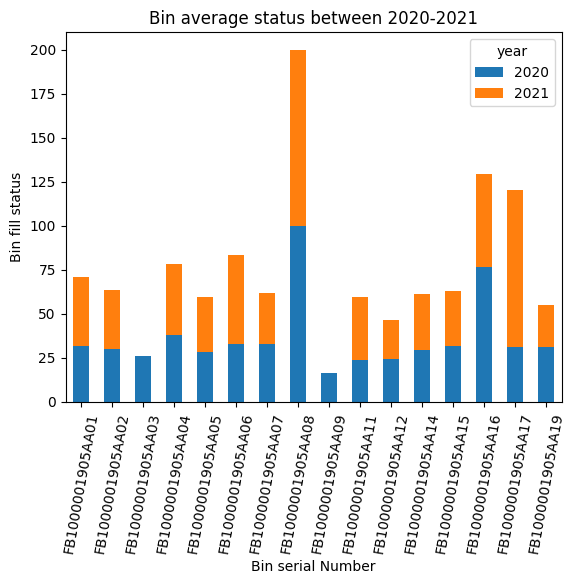

In [41]:
#plot the average bin fill level between 2020-2021
binYear = df_binC2.groupby(['serial','year']).status_current_fill_level.agg('mean')
binYear.unstack().plot(kind='bar',stacked=True)
plt.xlabel('Bin serial Number')
plt.ylabel('Bin fill status')
plt.title('Bin average status between 2020-2021')
plt.xticks(rotation = 80)
plt.show()

The bar plot show smart bin FB1000001905AA08 had the highest average bin fill level following by smart bin FB1000001905AA16 and FB1000001905AA17

##### Visualize the total bin fill level on map

In [42]:
#create total bin fill level dataset
binLvSum=df_binC2.groupby(['serial']).status_current_fill_level.agg('sum')
df_serialSum=df_serial.copy()
df_serialSum['bin_level_sum']=list(binLvSum)
df_serialSum

,serial,encode,lat,long,bin_level_sum
0,FB1000001905AA01,0,-37.803567,144.966500,65053
1,FB1000001905AA02,1,-37.803183,144.965267,57672
2,FB1000001905AA03,2,-37.803283,144.965217,7908
3,FB1000001905AA04,3,-37.802850,144.966300,72563
4,FB1000001905AA05,4,-37.802983,144.966267,52944
5,FB1000001905AA06,5,-37.802650,144.966000,45593
6,FB1000001905AA07,6,-37.803117,144.965233,56580
7,FB1000001905AA08,7,-37.802617,144.965817,173000
8,FB1000001905AA09,8,-37.802617,144.966050,1823
9,FB1000001905AA11,9,-37.802133,144.966083,56759


In [43]:
#plot on the map
import folium
from folium.plugins import HeatMap

location_argyle=[-37.8027,144.9657]
m=folium.Map(location=location_argyle, zoom_start=18)

heatmapList=[]
for b in range(df_serialSum.shape[0]):
    binLevel=df_serialSum.iloc[b]
    bin_name=binLevel[0]
    lat=binLevel[2]
    long=binLevel[3]
    level=float(binLevel[4])
    binlevlist=[lat,long,level]
    heatmapList.append(binlevlist)
    folium.Marker(location=[lat,long], popup = bin_name+'\nTotal fill level:'+str(level), 
                  icon=folium.Icon(color='purple', icon='trash')).add_to(m)

HeatMap(heatmapList).add_to(m)
    
print("Visualize Smart Bin overall fill level between 2020-2021")
print('\nFill level color explain from high to low: red-> yellow-> green-> blue')
m

Visualize Smart Bin overall fill level between 2020-2021

Fill level color explain from high to low: red-> yellow-> green-> blue


The plotted map shown the reason why smart bin FB1000001905AA08 had the highest overall fill level between 2020-2021 because it was located in the center of the Argyle Square. 

### ML model training for Future Smart Bin Status Prediction

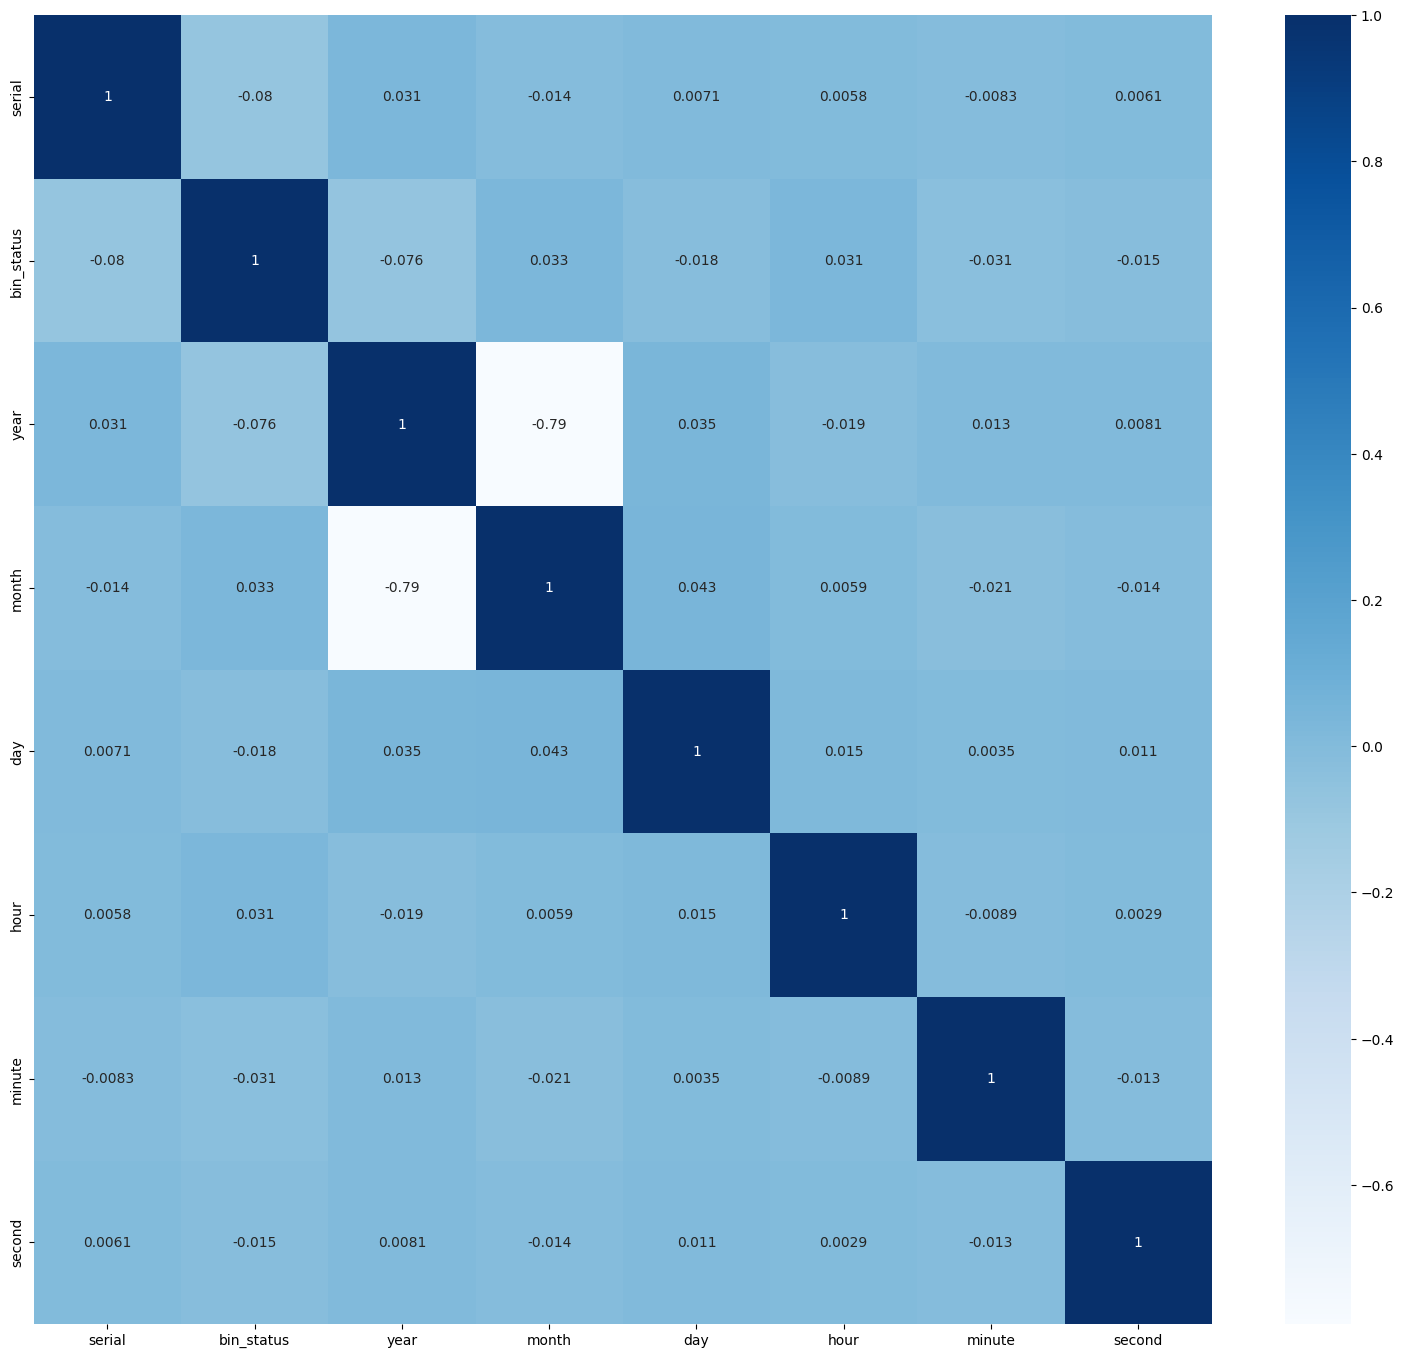

In [44]:
plt.figure(figsize=(19,17))
#Pearson correlation measure
corr_binC3=df_binC3.corr()
sns.heatmap(corr_binC3, annot=True, cmap=plt.cm.Blues)
plt.show()

In [45]:
#Correlation with output variable
#corr_target = corr_binC3["current_level"]
corr_target = corr_binC3["bin_status"]
print('Data Pearson Correlation')
corr_target

Data Pearson Correlation


serial       -0.080323
bin_status    1.000000
year         -0.076363
month         0.032639
day          -0.018458
hour          0.031462
minute       -0.030641
second       -0.015352
Name: bin_status, dtype: float64

All predictor data do not have significant correlation with the target data bin_status based on the Pearson Correlation graph above, this may impact on the performance of ML model that using these data for prediction, further ML parameter tunning may needed to improve ML model performance

In [46]:
#Separate the data into feature and target labels
X = df_binC3.drop(['bin_status'],axis=1) #feature labels
y = df_binC3['bin_status'] #target label
#split the dataset with 80/20 split in random
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size=0.2, random_state=16)
#print data shape
#training data use for examine the feature important and model training
print("Training data")
print(Xtrain.shape)
print (ytrain.shape)
print("Testing data")
#testing data reserved for final testing 
print (Xtest.shape)
print (ytest.shape)

Training data
(20036, 7)
(20036,)
Testing data
(5010, 7)
(5010,)


In [47]:
#split training data into train data & validation data with 80/20 split
#Stratify parameter make sure both training and validation set have the same class proportion
Xvtrain, Xvalid, yvtrain, yvalid = train_test_split(Xtrain,ytrain, test_size=0.2, random_state=16, stratify=ytrain)

print("Training data")
print(Xvtrain.shape)
print (yvtrain.shape)
print("Validation data") 
print (Xvalid.shape)
print (yvalid.shape)

Training data
(16028, 7)
(16028,)
Validation data
(4008, 7)
(4008,)


### Build ML models to create AI solution to predict Bin Status in the future

#### Model_1: Decision Tree

In [48]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.metrics import accuracy_score, zero_one_loss
from sklearn.model_selection import cross_val_score
import timeit

from sklearn.tree import DecisionTreeClassifier

# Build a decision tree model
dtree_model = DecisionTreeClassifier(random_state=16,class_weight='balanced')
#Fit the model using our training data
dtree_model.fit(Xvtrain, yvtrain)
#predict 
yv_pred_dtree=dtree_model.predict(Xvalid) 

In [49]:
def printScore(testData,predictData):
    print(confusion_matrix(testData,predictData))
    print(classification_report(testData,predictData))

    # Model Accuracy: how often is the classifier correct?
    accuracy = metrics.accuracy_score(testData,predictData)
    print("Accuracy:", accuracy)
    
    precision=metrics.precision_score(testData,predictData, average='weighted')
    # Model Precision: what percentage of positive tuples are labeled as such?
    print("Precision:",precision)
    
    recall=metrics.recall_score(testData,predictData, average='weighted')
    # Model Recall: what percentage of positive tuples are labelled as such?
    print("Recall:",recall)
    
    f1=metrics.f1_score(testData,predictData, average='weighted')
    #Calculate F1 Score
    print("F1 Score:",f1)
    
    return accuracy,precision,recall,f1

In [50]:
print('Decision Tree Performance on validation set')
accuracy,precision,recall,f1=printScore(yvalid,yv_pred_dtree)

Decision Tree Performance on validation set
[[ 652   85   80]
 [  86  954  321]
 [  61  304 1465]]
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       817
           1       0.71      0.70      0.71      1361
           2       0.79      0.80      0.79      1830

    accuracy                           0.77      4008
   macro avg       0.77      0.77      0.77      4008
weighted avg       0.77      0.77      0.77      4008

Accuracy: 0.7662175648702595
Precision: 0.7660207071321273
Recall: 0.7662175648702595
F1 Score: 0.7660537643298702


In [51]:
print("10 fold cross validation result")
scores = cross_val_score(dtree_model, Xtrain, ytrain, cv=10)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
cvScore=scores.mean()

10 fold cross validation result
0.77 accuracy with a standard deviation of 0.01


In [52]:
#create a result table for all models
df_score=pd.DataFrame(columns=['ML_Model','accuracy', '10folds_accuracy', 'f1_score','precision', 'recall'])

df_score['ML_Model']=('Decision Tree','KNN','Random Forest','XgBoost','AdaBoost')
df_score.accuracy=0
df_score.iloc[0,1:]=(accuracy,cvScore,f1,precision,recall)

#### Model_2: KNN

In [53]:
from sklearn.neighbors import KNeighborsClassifier

# Build a kNN using default 5 neighbor nodes
knn_model = KNeighborsClassifier(n_neighbors=5)

#Fit the model using our training data
knn_model.fit(Xvtrain, yvtrain)

#use model to predict the validation data
yv_pred_knn=knn_model.predict(Xvalid) 

print('KNN Performance on validation set')
accuracy,precision,recall,f1=printScore(yvalid,yv_pred_knn)

KNN Performance on validation set
[[ 405  197  215]
 [ 226  663  472]
 [ 260  514 1056]]
              precision    recall  f1-score   support

           0       0.45      0.50      0.47       817
           1       0.48      0.49      0.48      1361
           2       0.61      0.58      0.59      1830

    accuracy                           0.53      4008
   macro avg       0.51      0.52      0.52      4008
weighted avg       0.53      0.53      0.53      4008

Accuracy: 0.5299401197604791
Precision: 0.5331336908189976
Recall: 0.5299401197604791
F1 Score: 0.531191276652929


In [54]:
print("10 fold cross validation result")
scores = cross_val_score(knn_model, Xtrain, ytrain, cv=10)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
cvScore=scores.mean()
df_score.iloc[1,1:]=(accuracy,cvScore,f1,precision,recall)

10 fold cross validation result
0.52 accuracy with a standard deviation of 0.01


#### Model_3: Random Forest

In [55]:
from sklearn.ensemble import RandomForestClassifier
# Build a  model
rf_model = RandomForestClassifier(class_weight='balanced',random_state=16)

#Fit the model using our training data
rf_model.fit(Xvtrain, yvtrain)

yv_pred_rf=rf_model.predict(Xvalid) 

print('Random forest Performance on validation set')
accuracy,precision,recall,f1=printScore(yvalid,yv_pred_rf)

Random forest Performance on validation set
[[ 621  114   82]
 [  41  964  356]
 [  13  234 1583]]
              precision    recall  f1-score   support

           0       0.92      0.76      0.83       817
           1       0.73      0.71      0.72      1361
           2       0.78      0.87      0.82      1830

    accuracy                           0.79      4008
   macro avg       0.81      0.78      0.79      4008
weighted avg       0.79      0.79      0.79      4008

Accuracy: 0.7904191616766467
Precision: 0.7946700119781918
Recall: 0.7904191616766467
F1 Score: 0.7899855023627607


In [56]:
print("10 fold cross validation result")
scores = cross_val_score(rf_model, Xtrain, ytrain, cv=10)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
cvScore=scores.mean()
df_score.iloc[2,1:]=(accuracy,cvScore,f1,precision,recall)

10 fold cross validation result
0.79 accuracy with a standard deviation of 0.01


#### Model_4: XgBoost

In [57]:
# Best XGBoost Model
from xgboost import XGBClassifier  

# Build a  model
xgb_model = XGBClassifier(random_state=16)

#Fit the model using our training data
xgb_model.fit(Xvtrain, yvtrain)

yv_pred_xgb=xgb_model.predict(Xvalid) 

print('XgBoost Performance on validation set')
accuracy,precision,recall,f1=printScore(yvalid,yv_pred_xgb)

XgBoost Performance on validation set
[[ 603  120   94]
 [  51  903  407]
 [  19  268 1543]]
              precision    recall  f1-score   support

           0       0.90      0.74      0.81       817
           1       0.70      0.66      0.68      1361
           2       0.75      0.84      0.80      1830

    accuracy                           0.76      4008
   macro avg       0.78      0.75      0.76      4008
weighted avg       0.76      0.76      0.76      4008

Accuracy: 0.7607285429141717
Precision: 0.7648296822495086
Recall: 0.7607285429141717
F1 Score: 0.7599490858545292


In [58]:
print("10 fold cross validation result")
scores = cross_val_score(xgb_model, Xtrain, ytrain, cv=10)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
cvScore=scores.mean()
df_score.iloc[3,1:]=(accuracy,cvScore,f1,precision,recall)

10 fold cross validation result
0.76 accuracy with a standard deviation of 0.01


#### Model_5: AdaBoost

In [59]:
from sklearn.ensemble import AdaBoostClassifier
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html

# Build model
ada_model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=21,class_weight='balanced'),random_state=16)

#Fit the model using our training data
ada_model.fit(Xvtrain, yvtrain)
#use model to predict the validation data
yv_pred_ada=ada_model.predict(Xvalid) 

print('AdaBoost Performance on validation set')
accuracy,precision,recall,f1=printScore(yvalid,yv_pred_ada)


AdaBoost Performance on validation set
[[ 627  106   84]
 [  46  942  373]
 [  23  246 1561]]
              precision    recall  f1-score   support

           0       0.90      0.77      0.83       817
           1       0.73      0.69      0.71      1361
           2       0.77      0.85      0.81      1830

    accuracy                           0.78      4008
   macro avg       0.80      0.77      0.78      4008
weighted avg       0.78      0.78      0.78      4008

Accuracy: 0.780938123752495
Precision: 0.7840203293482736
Recall: 0.780938123752495
F1 Score: 0.7803518219333723


In [60]:
print("10 fold cross validation result")
scores = cross_val_score(xgb_model, Xtrain, ytrain, cv=10)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
cvScore=scores.mean()
df_score.iloc[4,1:]=(accuracy,cvScore,f1,precision,recall)

10 fold cross validation result
0.76 accuracy with a standard deviation of 0.01


In [61]:
df_score

,ML_Model,accuracy,10folds_accuracy,f1_score,precision,recall
0,Decision Tree,0.766218,0.772661,0.766054,0.766021,0.766218
1,KNN,0.529940,0.520464,0.531191,0.533134,0.52994
2,Random Forest,0.790419,0.788531,0.789986,0.79467,0.790419
3,XgBoost,0.760729,0.76128,0.759949,0.76483,0.760729
4,AdaBoost,0.780938,0.76128,0.780352,0.78402,0.780938


The test result comparison of all 5 models


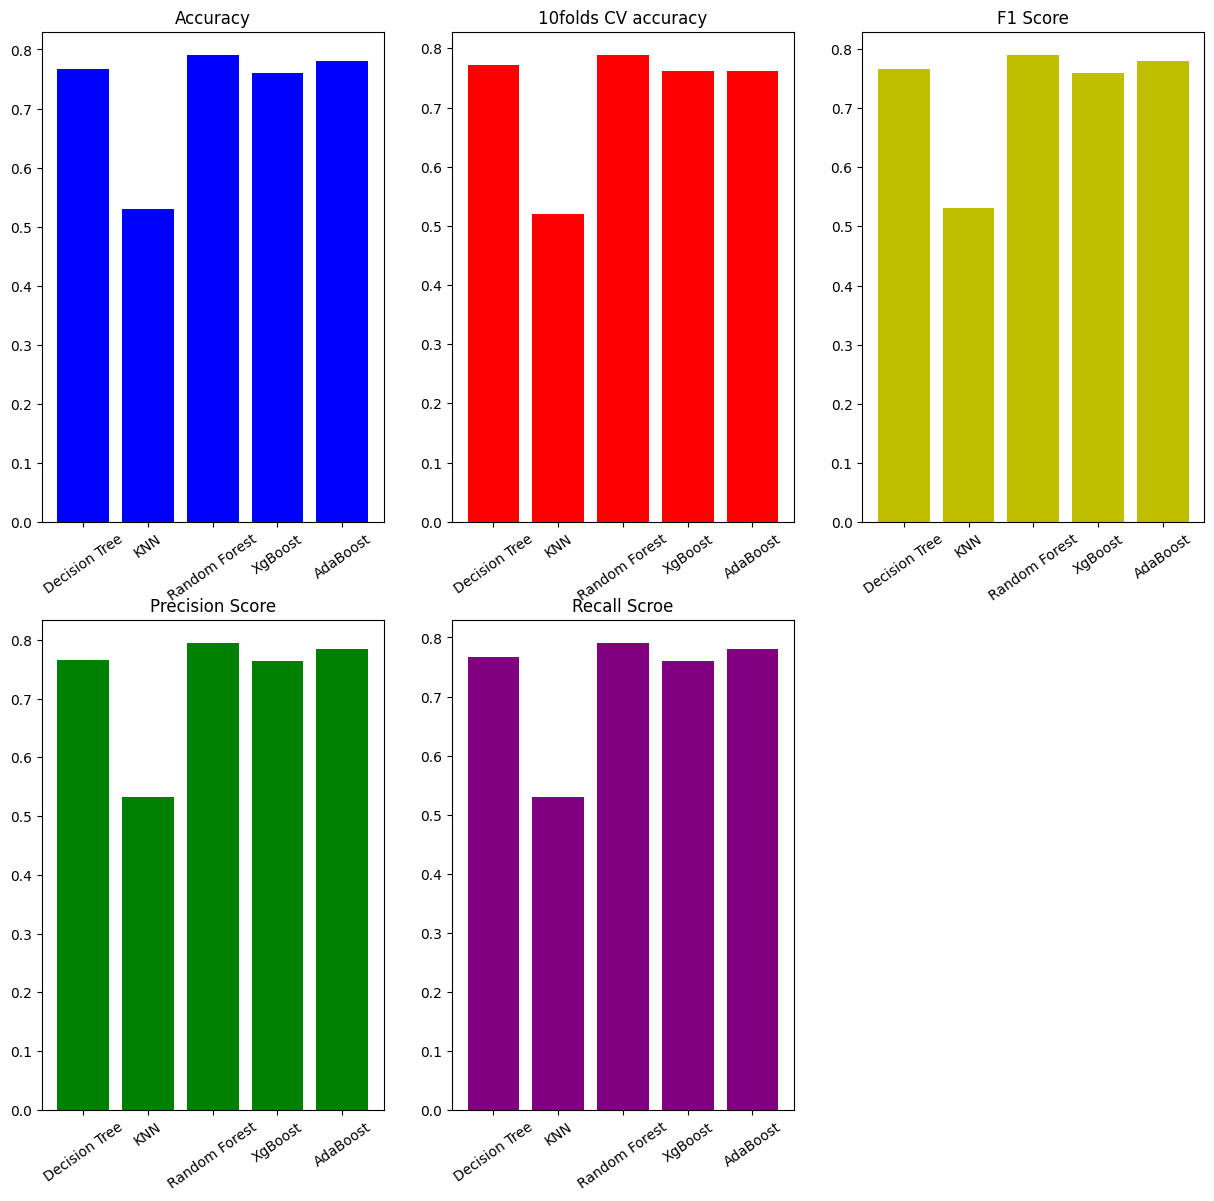

In [62]:
print("The test result comparison of all 5 models")
plt.figure(figsize=(15,14))
plt.subplot(2,3,1)
plt.bar(df_score['ML_Model'],df_score['accuracy'],color='b')
plt.title('Accuracy')
plt.xticks(rotation = 35)
plt.subplot(2,3,2)
plt.bar(df_score['ML_Model'],df_score['10folds_accuracy'],color='r')
plt.title('10folds CV accuracy')
plt.xticks(rotation = 35)
plt.subplot(2,3,3)
plt.bar(df_score['ML_Model'],df_score['f1_score'],color='y')
plt.title('F1 Score')
plt.xticks(rotation = 35)
plt.subplot(2,3,4)
plt.bar(df_score['ML_Model'],df_score['precision'], color='g')
plt.title('Precision Score')
plt.xticks(rotation = 35)
plt.subplot(2,3,5)
plt.bar(df_score['ML_Model'],df_score['recall'], color='purple')
plt.title('Recall Scroe')
plt.xticks(rotation = 35)
plt.show()

As training result above, we can see Random Forest produced the best results on the validation dataset across all performance metrics, therefore proceed to fine-tunning this best ML model to improve its performance.

#### Fine-tunning Best ML model

##### Finding best Max Tree depth

##### Finding best number of trees

##### Conduct GridSearch based on the best parameters above

##### Train ML model using best parameters from GridSearch

In [63]:
# Build a  model
rf_model = RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=30, n_estimators=250,max_features=None, random_state=16)

#Fit the model using our training data
rf_model.fit(Xvtrain, yvtrain)

yv_pred_rf=rf_model.predict(Xvalid) 

print('Random forest Performance on validation set')
printScore(yvalid,yv_pred_rf)

print("10 fold cross validation result")
scores = cross_val_score(rf_model, Xtrain, ytrain, cv=10)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
cvScore=scores.mean()

Random forest Performance on validation set
[[ 650  100   67]
 [  54  996  311]
 [  25  221 1584]]
              precision    recall  f1-score   support

           0       0.89      0.80      0.84       817
           1       0.76      0.73      0.74      1361
           2       0.81      0.87      0.84      1830

    accuracy                           0.81      4008
   macro avg       0.82      0.80      0.81      4008
weighted avg       0.81      0.81      0.81      4008

Accuracy: 0.8058882235528942
Precision: 0.8071782604586477
Recall: 0.8058882235528942
F1 Score: 0.8054450890507754
10 fold cross validation result
0.82 accuracy with a standard deviation of 0.01


From the result above we can see both the weighted average accuracy and 10folds CV accuracy have been improved using the best parameters found by the GridSearch to train the model.

##### Apply ML model on the test set to check final performance

In [64]:
y_pred_rf=rf_model.predict(Xtest) 

print('Random forest Performance on test set')
accuracy,precision,recall,f1=printScore(ytest,y_pred_rf)

Random forest Performance on test set
[[ 832  110   81]
 [  55 1264  411]
 [  22  286 1949]]
              precision    recall  f1-score   support

           0       0.92      0.81      0.86      1023
           1       0.76      0.73      0.75      1730
           2       0.80      0.86      0.83      2257

    accuracy                           0.81      5010
   macro avg       0.83      0.80      0.81      5010
weighted avg       0.81      0.81      0.81      5010

Accuracy: 0.8073852295409182
Precision: 0.8095271215821003
Recall: 0.8073852295409182
F1 Score: 0.8071576254771878


Since the model have generated great result by producing overall accuracy of over 80%, proceed to apply the model for smart bin fill level prediction.

#### Apply Best ML model to predict bin status

In [65]:
print("Please enter data and time for bin status prediction")
userInput=[]

while True:
    try:
        year = int(input("Enter year:"))
        month = int(input("Enter month:"))
        assert 1 <= month <= 12
        day = int(input("Enter day:"))
        if month in [4,6,9,11]:
            assert 1 <= day <= 30
        elif month == 2:
            assert 1 <= day <= (28 or 29)
        else:
            assert 1 <= day <= 31
        hour = int(input("Enter hour:"))
        assert 0 <= hour <= 24
        minute = int(input("Enter minute:"))
        assert 0 <= minute <= 60
        second = int(input("Enter second:"))
        assert 0 <= second <= 60
    except ValueError:
        print("Please enter an integer.")
    except AssertionError:
        print("Please enter correct data")
    else:
        break

userInput.extend([year,month,day,hour,minute,second])
userInput

Please enter data and time for bin status prediction
Enter year:2033
Enter month:12
Enter day:23
Enter hour:11
Enter minute:20
Enter second:30


[2033, 12, 23, 11, 20, 30]

In [66]:
#multiple user inputs into all smart bins
df_userInput=pd.DataFrame(columns=Xtest.columns)
df_userInput.serial=df_serial.encode
df_userInput.loc[:,1:]=userInput
df_userInput

,serial,year,month,day,hour,minute,second
0,0,2033,12,23,11,20,30
1,1,2033,12,23,11,20,30
2,2,2033,12,23,11,20,30
3,3,2033,12,23,11,20,30
4,4,2033,12,23,11,20,30
5,5,2033,12,23,11,20,30
6,6,2033,12,23,11,20,30
7,7,2033,12,23,11,20,30
8,8,2033,12,23,11,20,30
9,9,2033,12,23,11,20,30


In [67]:
#add prediction outcome of the bin status to the serial dataset
status_userInput=rf_model.predict(df_userInput)
status_userInput2=[]
for i in range(len(status_userInput)):
    status_userInput2.append(df_status.loc[df_status.encode==status_userInput[i],'bin_status'].values[0])
df_serialS=df_serial.copy()
df_serialS['bin_status']=status_userInput2
df_serialS

,serial,encode,lat,long,bin_status
0,FB1000001905AA01,0,-37.803567,144.966500,Half Full
1,FB1000001905AA02,1,-37.803183,144.965267,Low
2,FB1000001905AA03,2,-37.803283,144.965217,Low
3,FB1000001905AA04,3,-37.802850,144.966300,Low
4,FB1000001905AA05,4,-37.802983,144.966267,Low
5,FB1000001905AA06,5,-37.802650,144.966000,Low
6,FB1000001905AA07,6,-37.803117,144.965233,Low
7,FB1000001905AA08,7,-37.802617,144.965817,Full
8,FB1000001905AA09,8,-37.802617,144.966050,Low
9,FB1000001905AA11,9,-37.802133,144.966083,Low


#### Visualize Data on Map

In [68]:
import folium

location_argyle=[-37.8027,144.9657]
m=folium.Map(location=location_argyle, zoom_start=18)

for b in range(df_serialS.shape[0]):
    result=df_serialS.iloc[b]
    bin_name=result[0]
    lat=result[2]
    long=result[3]
    status=result[4]
    if status=='Low':
        color='green'
    elif status=='Half Full':
        color='orange'
    else:
        color='red'
    folium.Marker(location=[lat,long], popup = bin_name+"\nBin Status:"+status, icon=folium.Icon(color=color,icon='trash')).add_to(m)
    
print("Visualize Smart Bin status on","-".join(str(i) for i in userInput[:3]),":".join(str(i) for i in userInput[3:]))
print('\n Bin Status color Red: Full, Orange: Half Full, Green: Low')
m

Visualize Smart Bin status on 2033-12-23 11:20:30

 Bin Status color Red: Full, Orange: Half Full, Green: Low


In [69]:
#put all into one function to predict bin status
def predict_binStatus(model):
    #enter user data
    print("Please enter data and time for bin status prediction")
    userInput=[]
    while True:
        try:
            year = int(input("Enter year:"))
            month = int(input("Enter month:"))
            assert 1 <= month <= 12
            day = int(input("Enter day:"))
            if month in [4,6,9,11]:
                assert 1 <= day <= 30
            elif month == 2:
                assert 1 <= day <= (28 or 29)
            else:
                assert 1 <= day <= 31
            hour = int(input("Enter hour:"))
            assert 0 <= hour <= 24
            minute = int(input("Enter minute:"))
            assert 0 <= minute <= 60
            second = int(input("Enter second:"))
            assert 0 <= second <= 60
        except ValueError:
            print("Please enter an integer.")
        except AssertionError:
            print("Please enter correct data")
        else:
            break
    userInput.extend([year,month,day,hour,minute,second])
    userInput
    #multiple user inputs into all smart bins
    df_userInput=pd.DataFrame(columns=Xtest.columns)
    df_userInput.serial=df_serial.encode
    df_userInput.loc[:,1:]=userInput
    #add prediction outcome of the bin status to the serial dataset
    status_userInput=model.predict(df_userInput)
    status_userInput2=[]
    for i in range(len(status_userInput)):
        status_userInput2.append(df_status.loc[df_status.encode==status_userInput[i],'bin_status'].values[0])
    df_serialS=df_serial.copy()
    df_serialS['bin_status']=status_userInput2
    print(df_serialS)
    #plot on map
    location_argyle=[-37.8027,144.9657]
    m=folium.Map(location=location_argyle, zoom_start=18)
    for b in range(df_serialS.shape[0]):
        result=df_serialS.iloc[b]
        bin_name=result[0]
        lat=result[2]
        long=result[3]
        status=result[4]
        if status=='Low':
            color='green'
        elif status=='Half Full':
            color='orange'
        else:
            color='red'
        folium.Marker(location=[lat,long], popup = bin_name+"\nBin Status:"+status, icon=folium.Icon(color=color,icon='trash')).add_to(m)

    print("\nVisualize Smart Bin status on","-".join(str(i) for i in userInput[:3]),":".join(str(i) for i in userInput[3:]))
    print('\nBin Status color Red: Full, Orange: Half Full, Green: Low')
    return m
    
predict_binStatus(rf_model)

Please enter data and time for bin status prediction
Enter year:2123
Enter month:09
Enter day:25
Enter hour:13
Enter minute:20
Enter second:11
              serial  encode        lat        long bin_status
0   FB1000001905AA01       0 -37.803567  144.966500        Low
1   FB1000001905AA02       1 -37.803183  144.965267        Low
2   FB1000001905AA03       2 -37.803283  144.965217        Low
3   FB1000001905AA04       3 -37.802850  144.966300        Low
4   FB1000001905AA05       4 -37.802983  144.966267  Half Full
5   FB1000001905AA06       5 -37.802650  144.966000        Low
6   FB1000001905AA07       6 -37.803117  144.965233        Low
7   FB1000001905AA08       7 -37.802617  144.965817       Full
8   FB1000001905AA09       8 -37.802617  144.966050        Low
9   FB1000001905AA11       9 -37.802133  144.966083        Low
10  FB1000001905AA12      10 -37.802367  144.966167  Half Full
11  FB1000001905AA14      11 -37.802167  144.965333        Low
12  FB1000001905AA15      12 -37.80201

Using this AI/ML application, City of Melbourne Council can predict what the future fill level of each smart bin located in Argyle Square to faciliate Waste management planning, and potentially reduce human/monetary resource spending on unnecessary trip to empty each smart bins.

In [70]:
predict_binStatus(rf_model)

Please enter data and time for bin status prediction
Enter year:1996
Enter month:03
Enter day:28
Enter hour:19
Enter minute:07
Enter second:15
              serial  encode        lat        long bin_status
0   FB1000001905AA01       0 -37.803567  144.966500  Half Full
1   FB1000001905AA02       1 -37.803183  144.965267        Low
2   FB1000001905AA03       2 -37.803283  144.965217        Low
3   FB1000001905AA04       3 -37.802850  144.966300  Half Full
4   FB1000001905AA05       4 -37.802983  144.966267  Half Full
5   FB1000001905AA06       5 -37.802650  144.966000  Half Full
6   FB1000001905AA07       6 -37.803117  144.965233        Low
7   FB1000001905AA08       7 -37.802617  144.965817       Full
8   FB1000001905AA09       8 -37.802617  144.966050        Low
9   FB1000001905AA11       9 -37.802133  144.966083        Low
10  FB1000001905AA12      10 -37.802367  144.966167        Low
11  FB1000001905AA14      11 -37.802167  144.965333        Low
12  FB1000001905AA15      12 -37.80201

The model can also predict Smart bin fill level in the past that allow City of Melbourne Council to simulate different city planning senarios that if Smart bin has been introduced earlier. 